In [45]:
import trimesh

import torch
from torch.utils.data import Dataset
from tqdm import tqdm

import sys
sys.path.append('/home/s94zalek/shape_matching')

import my_code.datasets.template_dataset as template_dataset
import datasets_code.shape_dataset as shape_dataset


dataset_faust_single = shape_dataset.SingleFaustDataset(
        data_root='data/FAUST_original',
        phase='train',
        return_faces=True,
        return_evecs=True, num_evecs=32,
        return_corr=True, return_dist=False
    )

In [48]:
from my_code.datasets.surreal_dataset import SingleSurrealDataset

n_body_types_male=6
n_body_types_female=6
n_poses_straight=8
n_poses_bent=4
num_evecs=32

dataset_surreal = SingleSurrealDataset(
    n_body_types_male=n_body_types_male,
    n_body_types_female=n_body_types_female,
    n_poses_straight=n_poses_straight,
    n_poses_bent=n_poses_bent,
    num_evecs=num_evecs
)

Generating female shapes: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.02it/s]


In [47]:
scene = trimesh.Scene()

template = trimesh.load('/home/s94zalek/shape_matching/data/SURREAL_full/template/template.ply')

In [ ]:
import my_code.datasets.preprocessing as preprocessing

template_translated = preprocessing.center(template.vertices)[0]
template_translated_mesh = trimesh.Trimesh(vertices=template_translated, faces=template.faces, vertex_colors=[0, 0, 255, 255])

scene.geometry.clear()

scene.add_geometry(template)
scene.add_geometry(template_translated_mesh)

axis_scene = trimesh.creation.axis(origin_size=0.1)
scene.add_geometry(axis_scene)

scene.show()

In [ ]:
import numpy as np

scene.geometry.clear()

scene.add_geometry(template_translated_mesh)
scene.add_geometry(axis_scene)

for i, idx in enumerate(range(0, 25, 5)):
    
    mesh_data = dataset_surreal[idx]['second']
    
    faces = mesh_data['faces'].numpy()

    verts = preprocessing.center(mesh_data['verts'].numpy())[0]
    verts = preprocessing.scale(
        input_verts=verts,
        input_faces=faces,
        ref_verts=template_translated_mesh.vertices,
        ref_faces=template_translated_mesh.faces
        )[0]
    
    mesh_surreal = trimesh.Trimesh(
        vertices=verts + np.array([i + 0, -1, 0]),
        faces=faces
        )
    scene.add_geometry(mesh_surreal)
    
    
for i, idx in enumerate(range(0, 25, 5)):
    
    mesh_data = dataset_faust_single[idx]
    
    faces = mesh_data['faces'].numpy()
    
    verts = preprocessing.center(mesh_data['verts'].numpy())[0]
    verts = preprocessing.scale(
        input_verts=verts,
        input_faces=faces,
        ref_verts=template_translated_mesh.vertices,
        ref_faces=template_translated_mesh.faces
        )[0]
    
    mesh_faust = trimesh.Trimesh(
        vertices=verts + np.array([i + 0.1, 0, 0]),
        faces=faces
        )
    scene.add_geometry(mesh_faust)
    
scene.show()
    

In [81]:
evals_faust = torch.stack([dataset_faust_single[i]['evals'] for i in range(len(dataset_faust_single))])
evals_template = dataset_surreal[0]['first']['evals']

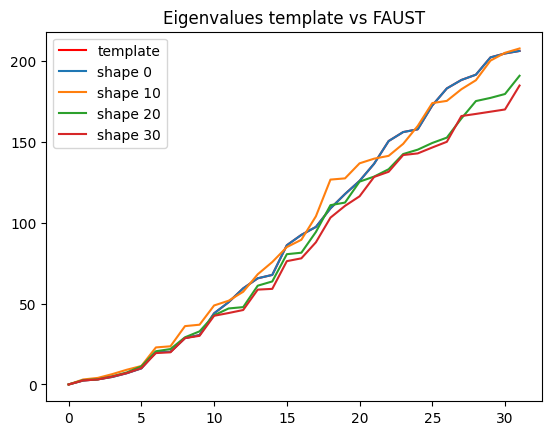

In [82]:
import matplotlib.pyplot as plt

# plot the evals for template and shape 0

# fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.plot(evals_template[0], 'r-', label='template')
plt.plot(evals_faust[0][0], label='shape 0')
plt.plot(evals_faust[10][0], label='shape 10')
plt.plot(evals_faust[20][0], label='shape 20')
plt.plot(evals_faust[30][0], label='shape 30')

plt.title('Eigenvalues template vs FAUST')
plt.legend()
plt.show()

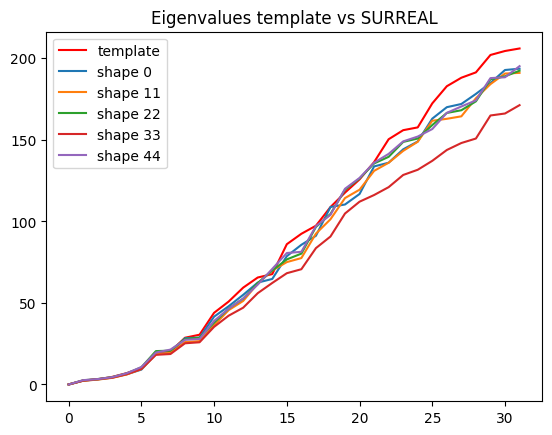

In [83]:
# plot the evals for template and shape 0

# fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.plot(evals_template[0], 'r-', label='template')
plt.plot(dataset_surreal[0]['second']['evals'][0], label='shape 0')
plt.plot(dataset_surreal[11]['second']['evals'][0], label='shape 11')
plt.plot(dataset_surreal[22]['second']['evals'][0], label='shape 22')
plt.plot(dataset_surreal[33]['second']['evals'][0], label='shape 33')
plt.plot(dataset_surreal[44]['second']['evals'][0], label='shape 44')

plt.title('Eigenvalues template vs SURREAL')
plt.legend()
plt.show()